At the value of -3.50, the function gets its minimum of -2.25


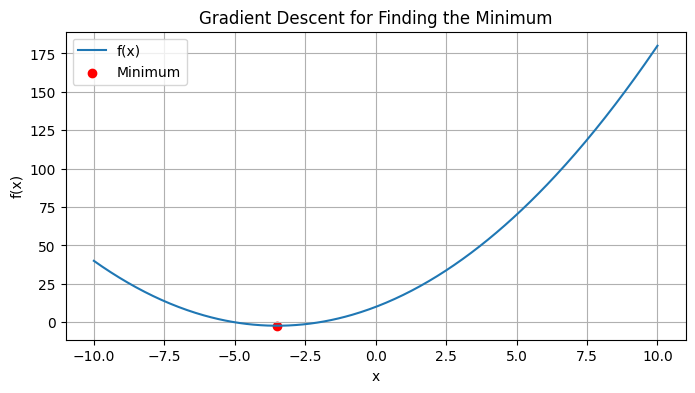

In [42]:
#gradient descent for finding the quadratic functions minimum
import numpy as np
import matplotlib.pyplot as plt

# Define functions f and df
f = lambda x: x**2 + 7*x + 10
df = lambda x: 2*x + 7

# Gradient descent-------------------------------
x = 0  # Initialize
num_iter = 1000
learning_rate = 0.01
for _ in range(num_iter):
    x = x - learning_rate * df(x)
#------------------------------------------------
# Print the result
print('At the value of {:.2f}, the function gets its minimum of {:.2f}'.format(x, f(x)))

# Plotting
plt.figure(figsize=(8, 4))
k = np.linspace(-10, 10, 400)
plt.plot(k, f(k), label='f(x)')
plt.scatter(x, f(x), color='red', label='Minimum')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent for Finding the Minimum')
plt.legend()
plt.grid(True)
plt.show()


At the value of [0. 0. 0.], the function gets its minimum of 0.0


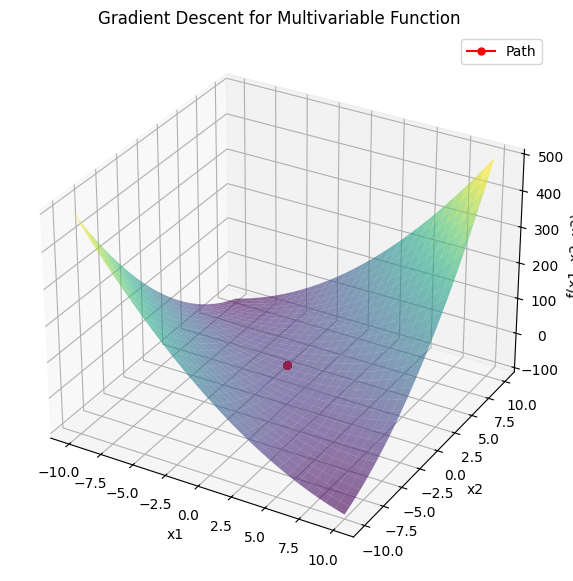

In [46]:
# For MultiVariable Function
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function and its gradient
def f(x): # x is the list of [x1,x2,x3]
    x1, x2, x3 = x
    return x1**2 + x2**2 + x3**2 + 3*x1*x2 - 2*x2*x3

def gradient(x):
    x1, x2, x3 = x
    df_dx1 = 2*x1 + 3*x2
    df_dx2 = 2*x2 + 3*x1 - 2*x3
    df_dx3 = 2*x3 - 2*x2
    return np.array([df_dx1, df_dx2, df_dx3])

# Gradient Descent
def gradient_descent(starting_point, learning_rate, num_iterations):
    x = starting_point
    history = [x]
    for _ in range(num_iterations):
        grad = gradient(x)
        x = x - learning_rate * grad
        history.append(x)
    return np.array(history)

# Parameters
starting_point = np.array([0, 0, 0])
learning_rate = 0.01
num_iterations = 1000

# Run gradient descent
history = gradient_descent(starting_point, learning_rate, num_iterations)

# Print final result
final_point = history[-1]
print(f'At the value of {final_point}, the function gets its minimum of {f(final_point)}')

# Plotting (for 3D visualization of gradient descent path)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a grid of points
x1 = np.linspace(-10, 10, 30)
x2 = np.linspace(-10, 10, 30)
X1, X2 = np.meshgrid(x1, x2)
Z = f([X1, X2, 0])  # To plot, fix x3 to 0

# Plot the surface
ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.6)

# Plot the path taken by gradient descent
path = np.array([f([x[0], x[1], 0]) for x in history])
ax.plot(history[:, 0], history[:, 1], path, 'ro-', markersize=5, label='Path')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2, x3)')
ax.set_title('Gradient Descent for Multivariable Function')
ax.legend()
plt.show()


At the value of -3.50, the function gets its minimum of -2.25


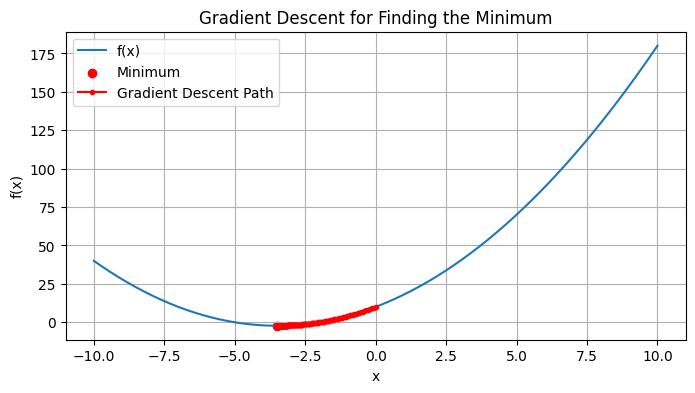

In [47]:
#here I added history list which includes all visited values during gradient descent
import numpy as np
import matplotlib.pyplot as plt

# Define functions f and df
f = lambda x: x**2 + 7*x + 10
df = lambda x: 2*x + 7

# Gradient Descent with History
def gradient_descent(starting_point, learning_rate, num_iterations):
    x = starting_point
    history = [x]  # Initialize history
    for _ in range(num_iterations):
        x = x - learning_rate * df(x)
        history.append(x)
    return np.array(history)

# Parameters
starting_point = 0
num_iter = 1000
learning_rate = 0.01

# Run Gradient Descent
history = gradient_descent(starting_point, learning_rate, num_iter)

# Print the result
final_x = history[-1]
print(f'At the value of {final_x:.2f}, the function gets its minimum of {f(final_x):.2f}')

# Plotting
plt.figure(figsize=(8, 4))

# Plot the function f(x)
k = np.linspace(-10, 10, 400)
plt.plot(k, f(k), label='f(x)')

# Plot the minimum point found by gradient descent
plt.scatter(final_x, f(final_x), color='red', label='Minimum')

# Plot the path taken by gradient descent
history_y = f(history)  # Compute function values at history points
plt.plot(history, history_y, 'ro-', markersize=3, label='Gradient Descent Path')

# Add labels and title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent for Finding the Minimum')
plt.legend()
plt.grid(True)
plt.show()


In [48]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations #n_iterations refers to the number of times the learning algorithm will 
                                         #go through the entire training dataset during the training process
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            # Predictions
            y_predicted = np.dot(X, self.weights) + self.bias # x1m1 + x2m2 + x3m3 + b

            # Calculate gradients  
            # a gradient refers to a vector that contains the partial derivatives of a function with respect to its parameters.
            # y = wx + b
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def r_squared(self, y_true, y_pred): # used for evaluation the model
        total_variance = np.sum((y_true - np.mean(y_true)) ** 2)
        residual_variance = np.sum((y_true - y_pred) ** 2)
        return 1 - (residual_variance / total_variance)   

# Example usage
if __name__ == "__main__":
    # Sample data
    X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
    y = np.array([1, 2, 2, 3])

    # Create and train the model
    model = LinearRegression(learning_rate=0.1, n_iterations=1000)
    model.fit(X, y)

    # Make predictions
    predictions = model.predict(X)

    # Evaluate error
    mse = model.mean_squared_error(y, predictions)
    r2 = model.r_squared(y, predictions)

    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    predictions = model.predict(np.array([[3, 5]]))
    print(predictions)  # Example output


Mean Squared Error: 2.6128151502273783e-10
R-squared: 0.999999999477437
[5.00002497]
